## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing the csv file

In [2]:
file = pd.read_csv("segmentation data.csv")
file.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## Data Preprocessing

In [3]:
# Checking the info of the data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
# describe the data
file.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
# check for null values
file.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
# check for duplicate values
file.duplicated().sum()

0

## Exploratory Data Analysis

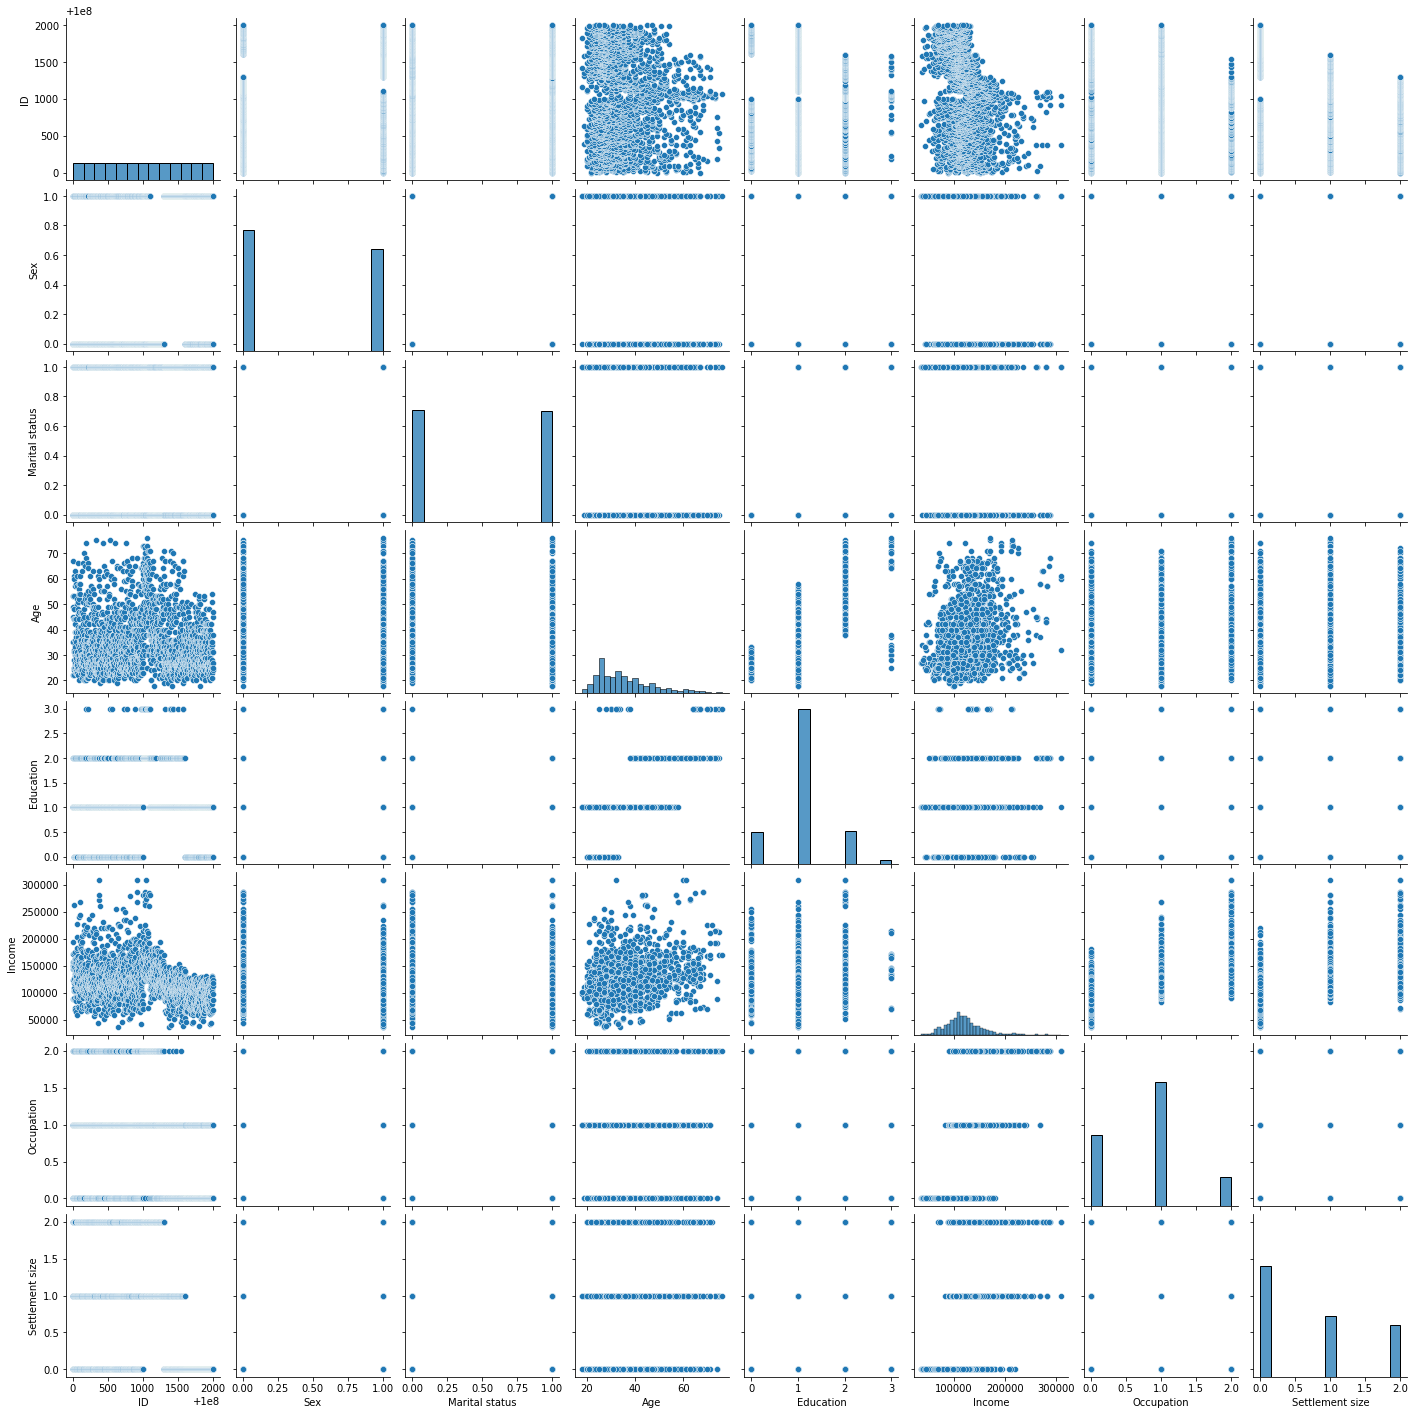

In [8]:
# pairplot
sns.pairplot(file)
plt.show()

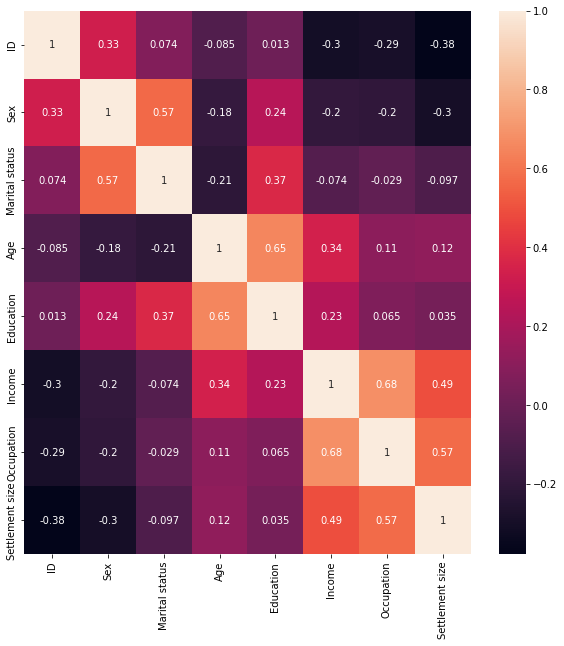

In [9]:
# checking correlation by heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(file.corr(), annot=True)
plt.show()

### Plot Description
- **Correlation Values**: The heatmap displays the correlation coefficients between pairs of variables. These coefficients range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear correlation.
- **Color Scale**: The colors range from dark purple (indicating a strong negative correlation), to light purple and shades of orange (indicating a positive correlation), with the intensity of the color corresponding to the strength of the correlation.
- **Variables**: The variable names are not shown in the axes, so it is unclear what each row and column represents.

### Insights from the Heatmap
- **Strong Positive Correlation**: There are a few instances of strong positive correlation, as indicated by the brighter shades of orange. For instance, two variables, Age and Education have a correlation of 0.65, suggesting a strong positive linear relationship.
- **Negative Correlations**: Darker purple shades indicate negative correlations. The strongest negative correlation visible in this heatmap is approximately -0.3, suggesting a moderate inverse relationship between those variables.
- **Weak to No Correlation**: Many of the variables show weak to no correlation, as indicated by the near-zero correlation coefficients and the darker colors close to the middle of the color scale.


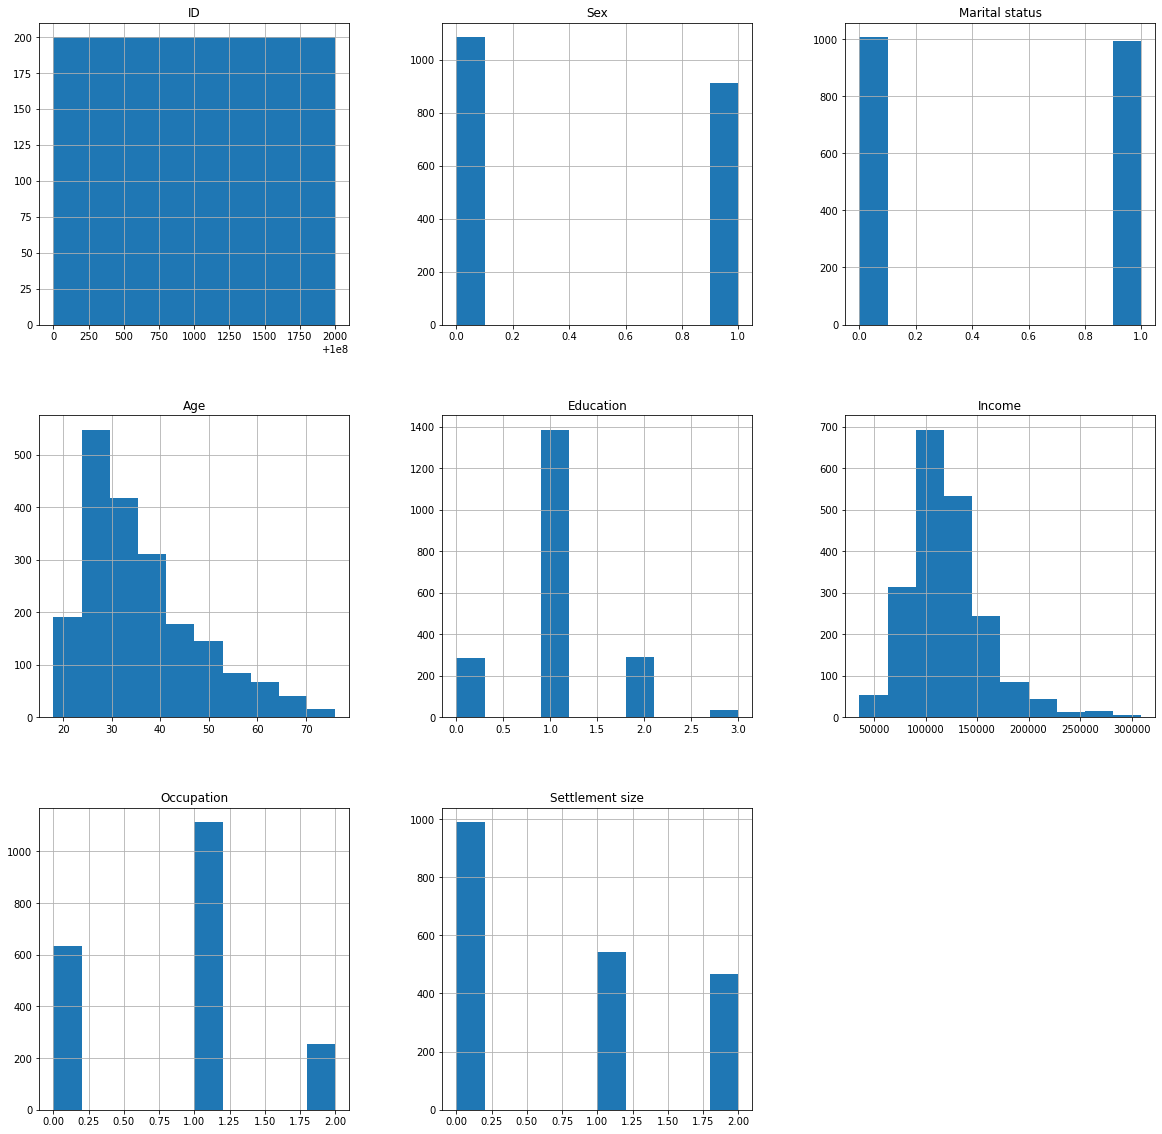

In [10]:
# check the distribution of the data
file.hist(figsize=(20, 20))
plt.show()

### Histogram Descriptions

**ID**:
- Displays a uniform distribution, suggesting that ID is likely a sequential numeric label assigned to each entry in the dataset.

**Sex**:
- Represents a binary variable, which could be indicative of gender, with two distinct bars showing the counts for each category.

**Marital Status**:
- Also appears to be binary, similar to the 'Sex' histogram, showing the counts for individuals who are possibly married or unmarried.

**Age**:
- Shows a right-skewed distribution with more younger individuals and fewer older ones. This is typical for populations where the number of younger individuals is higher.

**Education**:
- Displays a multi-modal distribution, suggesting that there are several distinct levels of education attained by individuals in the dataset.

**Income**:
- Demonstrates a right-skewed distribution, which is common for income data, indicating a smaller number of high-income individuals.

**Occupation**:
- Shows a highly skewed distribution with one category significantly more common than the other. This could imply that a particular occupation is much more prevalent in the sample.

**Settlement Size**:
- Exhibits a multi-modal distribution with three peaks, possibly indicating small, medium, and large settlement sizes.

### Insights

- The **'Sex'** and **'Marital Status'** histograms suggest categorical data that likely have two classes each.
- The **'Age'** histogram's right skew indicates a younger population overall or that the dataset includes a broader range of younger individuals.
- The **'Education'**, **'Occupation'**, and **'Settlement Size'** histograms suggest categorical data with a few distinct groups.
- The **'Income'** histogram suggests most individuals have a lower income, with the frequency decreasing as income increases, which is typical in general populations.


In [11]:
# change the ID column to index
file.set_index('ID', inplace=True)
file.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Applying Clustering Algorithm

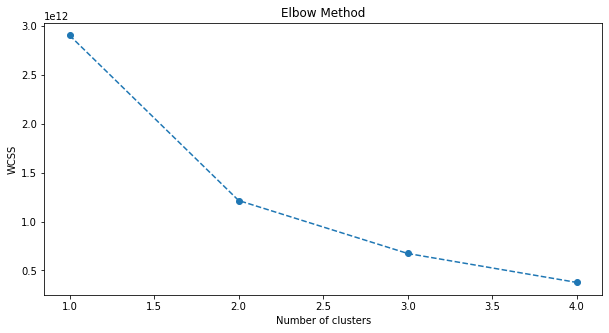

In [13]:
# 1) KMeans Clustering
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(file)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Code Description
- **KMeans Clustering**: The KMeans algorithm from the `sklearn.cluster` module is used, which is a popular unsupervised machine learning algorithm for clustering.
- **Elbow Method**: The elbow method involves running the KMeans algorithm on the dataset for a range of cluster numbers (in this case, from 1 to 5) and plotting the within-cluster sum of squares (WCSS) against the number of clusters.
- **WCSS**: Within-cluster sum of squares is a measure of the total variance within each cluster. A lower WCSS indicates that the clusters are more compact.
- **Random State**: The `random_state` parameter ensures that the method yields the same results across different runs.

### Plot Description
- The plot is a line graph with the number of clusters on the x-axis and the WCSS on the y-axis.
- The line graph shows a steep decline from 1 to 2 clusters and begins to level off after 3 clusters, suggesting that the additional clusters do not contribute significantly to decreasing the WCSS.

### Insights from the Elbow Plot
- **Optimal Clusters**: The elbow of the plot, where the rate of decrease sharply changes, is typically considered as the optimal number of clusters. In this plot, the elbow seems to be around 3 clusters, indicating that increasing the number of clusters beyond 3 doesn't yield as significant a reduction in WCSS.
- **Further Analysis**: While the elbow method suggests 3 clusters as optimal, it's sometimes beneficial to consider domain knowledge or the specific use case when choosing the number of clusters. It's not uncommon to select a number of clusters even if it's not the most pronounced elbow if it makes more sense for the application or yields more interpretable results.

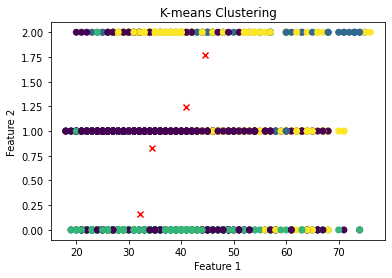

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(file)
y_kmeans = kmeans.predict(file)
centers = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(file.iloc[:, 2], file.iloc[:, 5], c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 2], centers[:,5], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()




# Visualize clusters
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-means Clustering')
# plt.show()

In [16]:
# 2) Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# apply the hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(file)

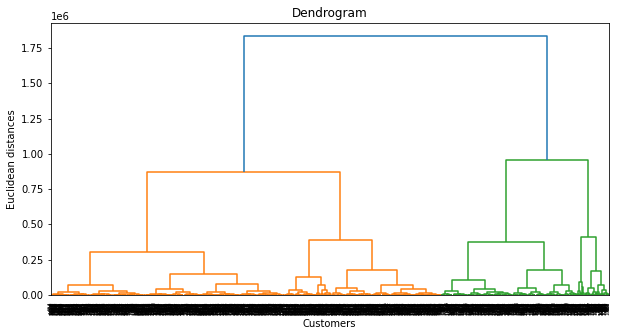

In [17]:
# dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage(file, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Code Summary
- The code uses the `AgglomerativeClustering` class from the `sklearn.cluster` module to apply hierarchical agglomerative clustering to the dataset.
- The number of clusters specified is 3, with 'euclidean' affinity and 'ward' linkage, which minimizes the variance of clusters being merged.
- A dendrogram is generated using the `scipy.cluster.hierarchy` module, which helps in visualizing the arrangement of the clusters formed.
- The dendrogram plot displays the Euclidean distances on the y-axis, which represent the distance between merging clusters.

### Dendrogram Insights
- The dendrogram shows the hierarchical relationship between data points, represented by the points along the bottom x-axis.
- The vertical lines represent the merges that occur, with the height of the line indicating the distance (or dissimilarity) at which the merge took place.
- Longer vertical lines suggest larger distances between merged clusters, which could indicate more distinct clusters.
- The color coding represents the cluster membership after a certain threshold of distance, which can be adjusted to cut the dendrogram horizontally at different heights to form a different number of clusters.

In [18]:
# 4) DBSCAN Clustering
from sklearn.cluster import DBSCAN

# apply the DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
y_dbscan = dbscan.fit_predict(file)

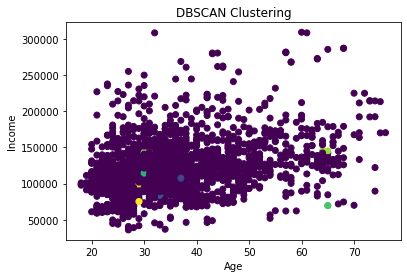

In [19]:
# visualize the clusters of dbscan
plt.scatter(file['Age'], file['Income'], c=y_dbscan)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('DBSCAN Clustering')
plt.show()

### Plot Description
- **Axes**: The x-axis represents 'Age', and the y-axis represents 'Income'.
- **Data Points**: Each point on the plot represents an individual in the dataset, plotted according to their age and income.
- **Color Coding**: The points are color-coded, which typically represents different clusters identified by the DBSCAN algorithm. The color coding helps differentiate between the dense clusters (core points) and the less dense areas (which could be considered noise or outliers).

### Insights
- **Cluster Formation**: DBSCAN appears to have identified a main dense cluster in the center of the plot, where points are closely packed together.
- **Outliers**: There are several points that stand out from the dense region, which might be considered outliers by DBSCAN. These could be individuals with higher or lower income relative to the main distribution or those whose age makes them distinct from others in the data.
- **Age-Income Distribution**: The distribution of income seems to spread as age increases, indicating variability in income distribution across different age groups.
